## Modeling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [2]:
# data upload 및 load
X_train, X_test, Y_train, Y_test = np.load('/content/datasets/news_data_max_27_size_24151.npy', allow_pickle=True)
# X_train, X_test, Y_train, Y_test = np.load('/content/datasets/news_data_max_16_size_984.npy', allow_pickle=True)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(24367, 27)
(2708, 27)
(24367, 6)
(2708, 6)


In [3]:
# modeling
# embedding : vectorizing 수행 
# - labeling 된 자료를 n차원으로 만들어 단어들 간의 수치적 관계를 설정
# input_length : 
# 차원이 커지면 더 많은 데이터가 필요, 학습이 되지 않는 문제가 발생함.
# - 차원이 너무 많이 커지지 않도록 일정 크기로 차원을 제한,
model = Sequential()
model.add(Embedding(24151, 300, input_length=27))

# 단어간의 관계를 해석하기 위한 도구로 conv1D 사용
model.add(Conv1D(32, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool1D(pool_size=1))
# 순서가 있는 데이터 분석이므로 LSTM 적용,
# returen sequence :True : LSTM 과정의 모든 결괏값이 출력됨, False 최종 결괏값만 출력
#                   LSTM을 중복으로 사용할 경우 순서대로 출력할 수 있도록 True적용
#                   맨 마지막 layer에 False 사용가능하나 Flatten() 함께 사용해야 함
model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, activation='tanh', return_sequences=False))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 27, 300)           7245300   
_________________________________________________________________
conv1d (Conv1D)              (None, 27, 32)            48032     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 27, 128)           82432     
_________________________________________________________________
dropout (Dropout)            (None, 27, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 27, 64)            49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 64)            0

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

fit_hist = model.fit(X_train, Y_train, 
                     epochs=8, 
                     batch_size=100, 
                     validation_data=(X_test, Y_test))


Epoch 1/8
244/244 [==============================] - 57s 86ms/step - loss: 1.4345 - accuracy: 0.3963 - val_loss: 1.0649 - val_accuracy: 0.6211
Epoch 2/8
244/244 [==============================] - 20s 80ms/step - loss: 0.8004 - accuracy: 0.7346 - val_loss: 0.7492 - val_accuracy: 0.7570
Epoch 3/8
244/244 [==============================] - 20s 81ms/step - loss: 0.4910 - accuracy: 0.8439 - val_loss: 0.7894 - val_accuracy: 0.7533
Epoch 4/8
244/244 [==============================] - 20s 81ms/step - loss: 0.3210 - accuracy: 0.9015 - val_loss: 0.8558 - val_accuracy: 0.7363
Epoch 5/8
244/244 [==============================] - 20s 81ms/step - loss: 0.2333 - accuracy: 0.9319 - val_loss: 0.8947 - val_accuracy: 0.7515
Epoch 6/8
244/244 [==============================] - 20s 81ms/step - loss: 0.1727 - accuracy: 0.9506 - val_loss: 1.0270 - val_accuracy: 0.7482
Epoch 7/8
244/244 [==============================] - 20s 80ms/step - loss: 0.1364 - accuracy: 0.9619 - val_loss: 1.0837 - val_accuracy: 0.7437

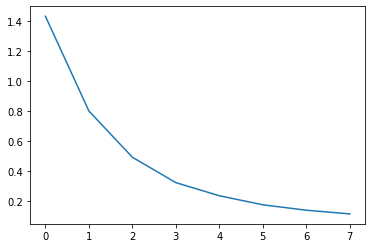

85/85 [==============================] - 1s 6ms/step - loss: 1.1647 - accuracy: 0.7500
0.75


In [5]:
plt.plot(fit_hist.history['loss'])
plt.show()
score = model.evaluate(X_test, Y_test, verbose=1)
print(score[1])

In [6]:
model.save('/content/models/news_classification_{}.h5'.format(score[1]))